In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "drive/MyDrive/aa/tp7_1"
%ls
%pwd

[Errno 2] No such file or directory: 'drive/MyDrive/aa/tp7_1'
/content/drive/My Drive/aa/tp7_1
curva.txt  one_layer_linear.h5


'/content/drive/My Drive/aa/tp7_1'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import random

**1) Um exemplo simples de ajustamento**

Lê o ficheiro 'curva.txt' e transforma x e y em colunas.


In [ ]:
mat = np.loadtxt('curva.txt')
xs = mat[:,:1]
ys = mat[:,1:]

Primeiro apagamos possíveis modelos anteriores existentes.

In [ ]:
keras.backend.clear_session()

De seguida, criamos um novo modelo sequencial, ao qual, acrescentamos uma camada com um neurónio de activação sigmóide.

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='sigmoid'))

Criamos depois o otimizador, neste caso Stochastic Gradient Descent (SGD), e indicamos a taxa/ritmo de aprendizagem (learning rate) e o momento (momentum).

In [ ]:
opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')

Finalmente, treinamos o modelo, dando para isso os valores de entrada, correspondentes valores de saída, número de épocas e tamanho do batch.

In [ ]:
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8999
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8301
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 1.7938
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7555
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 1.7174
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6851
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 1.6526
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 1.6245
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 1.5986
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5764
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5562
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5382
Epoch 13/200
13/13 [=================

Guardemos os pesos deste modelo.

In [ ]:
#model.save_weights('one_layer_linear.h5')
# se quisermos voltar a usar estes pesos no nosso modelo: model.load_weights('one_layer_linear.h5')

Depois de o modelo estar treinado, pode visualizar o ajuste do modelo aos dados de treino.

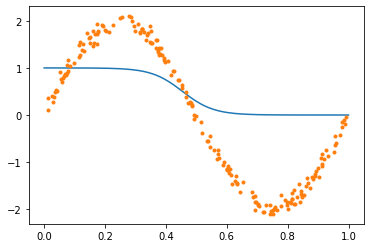

In [ ]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

A ativação sigmóide faz com que o valor de saída do modelo varie apenas entre 0 e 1, não se ajustando por isso bem à curva. 

**Alteremos para ativação linear.**

In [ ]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear',name='layer_1'))
opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 1.5523
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.9374
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7525
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7141
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7352
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7090
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7358
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7172
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7187
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7387
Epoch 11/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7349
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7500
Epoch 13/200
13/13 [=================

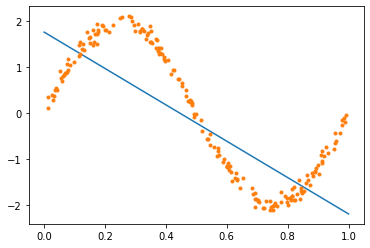

In [ ]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

Ao mudarmos o neurónio de activação **Sigmóide** para **Linear** houve um melhoramento no ajustamento. 
Houve também um decréscimo significativo no erro.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Adicionemos ao modelo anterior uma segunda camada com activação linear(activation='linear') e com um neurónio.


In [ ]:
model.add(layers.Dense(1,activation='linear',name='layer_2'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
layer_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Treinemos a rede de novo.

In [ ]:
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200,batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 1.0487
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7781
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7754
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7597
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7389
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7298
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.8171
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7607
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.8685
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 0.7560
Epoch 11/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7669
Epoch 12/200
13/13 [==============================] - 0s 1ms/step - loss: 0.7380
Epoch 13/200
13/13 [=================

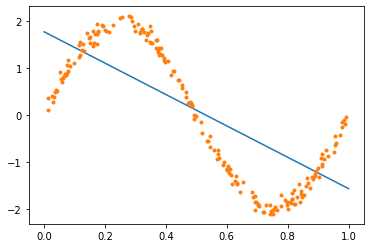

In [ ]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

Ao adicionarmos uma segunda camada com activação linear e com um neurónio houve um aumento no erro. Não houve melhorias.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
layer_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Adicionemos uma camada escondida com um neurónio com ativação sigmóide.

In [ ]:
keras.backend.clear_session()
model = keras.Sequential([
  keras.layers.Dense(1,activation='linear',name='layer1'),
  keras.layers.Dense(1,activation='sigmoid',name='layer2'),
  keras.layers.Dense(1,activation='linear',name='layer3')
])

opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 2.0508
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 2.0374
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 2.0448
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 2.0083
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 1.9316
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 1.7853
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 1.0313
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3996
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2425
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2439
Epoch 13/200
13/13 [=================

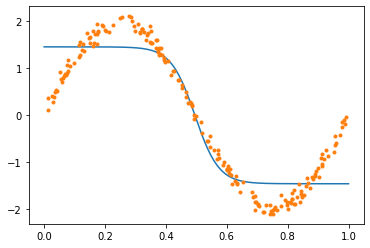

In [ ]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

Após adicionarmos uma camada escondida com um neurónio e ativação sigmóide houve uma diminuição significativa no nosso erro (mse=0.2329 - na última época).

Ao visualizarmos o gráfico acima, podemos ver que temos um ajuste muito melhor do que obtinhamos anteriormente. O nosso modelo nesta fase faz um ajustamento satisfatório.

Adicionemos mais um neurónio na camada com ativação sigmóide já existente.

In [ ]:
keras.backend.clear_session()
model = keras.Sequential([
  keras.layers.Dense(1,activation='linear',name='layer1'),
  keras.layers.Dense(2,activation='sigmoid',name='layer2'),
  keras.layers.Dense(1,activation='linear',name='layer3')
])

opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 1.8666
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 1.1713
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5019
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3970
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.3506
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2382
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2280
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2542
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2279
Epoch 13/200
13/13 [=================

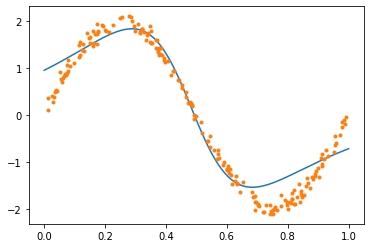

In [ ]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

Após adicionarmos um neurónio na camada com ativação sigmóide o erro passou para, aproximadamente, metade.

Ao observarmos os nossos resultados podemos ver que a curva se ajusta quase de uma forma perfeita. Será que vai causar overfitting? 


Por fim, vamos adicionar dois neurónios na camada com ativação sigmóide, compilar, treinar, visualizar e comparar os resultados anteriores. 

In [ ]:
keras.backend.clear_session()
keras.Sequential([
  keras.layers.Dense(1,activation='linear',name='layer1'),
  keras.layers.Dense(4,activation='sigmoid',name='layer2'),
  keras.layers.Dense(1,activation='linear',name='layer3')
])

opt = keras.optimizers.SGD(momentum = 0.9,learning_rate = 0.05)
model.compile(optimizer=opt,loss='mse')
model.fit(xs,ys,epochs=200, batch_size=16)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1047
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1120
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0950
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0885
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0980
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1120
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1028
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1219
Epoch 12/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1218
Epoch 13/200
13/13 [=================

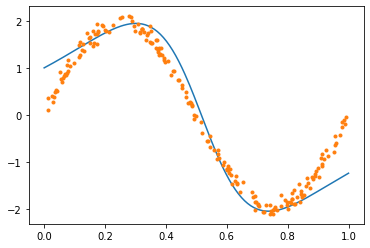

In [ ]:
x = np.linspace(0,1,200).reshape((-1,1))
y = model.predict(x)
plt.plot(x,y)
plt.plot(xs,ys,'.')

O tempo de treino deste modelo anda à volta de 2ms/época. Em relação ao exemplo anterior não houve um aumento significativo no tempo de execução. Mas em relação aos primeiros exemplos o tempo de treino aumentou para o dobro, o que se deve ao aumento da complexidade da rede. 

A adição de um neurónio pode aumentar bastante o tempo de treino pois estamos a trabalhar com redes neuronais fully connected.